In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# interactive in notebook
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
import pylab

### other module
from util_tsne import *

Automatically created module for IPython interactive environment


### training kernels

In [2]:
training_kernels = [[0.881481481,2.587229,0.907526,0,0.35,0.6005,4.322245],
[0.495752896,1.257769,0.721808,0,0.1,0.3069,1.658795],
[0.424892966,2.00134,0.98219,0,0.15,0.3513,1.958961],
[0.105555556,0.17028,0.116339,0,0.05,0.0401,0.165949],
[0.045238095,1.784725,0.854031,0,0.4,0.4464,3.497565],
[0.032925682,1.702509,0.990866,0,0.15,0.3404,2.33181],
[0.002206736,3.322614,0.699366,0,0.45,0.83,9.698005]]

training_kernels = np.array(training_kernels)

print training_kernels.shape

(7, 7)


### best block size for trainig kernels

In [3]:
# training kernel: best block size 
y =[256,
256,
256,
128,
128,
256,
768]

print len(y)
# y = np.array(y)
#print y.shape

7


### Prepare data

In [4]:
mykern = [[0.545671642,1.262241,0.321989,0,0.15,0.2578,1.349711]]

mykern = np.array(mykern)
#print em_gammaobs.shape

X = training_kernels
X = np.append(X, mykern, axis=0)

print X.shape

(8, 7)


In [5]:
#X

### tsne-3d

In [6]:
tsne3d = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne3d.fit_transform(X)

In [7]:
X_tsne

array([[-106.3991347 ,   16.13410391,    8.12302972],
       [  51.05617242,  118.77965148,  102.90709049],
       [  61.83608184, -545.70192521,  -74.24257653],
       [  99.90711143,  -44.58655818,    8.16832242],
       [  27.8442581 ,   61.21742724,  -17.83406427],
       [ 294.54837716,  261.18879766,  310.38352087],
       [ -15.82305115,  -35.40019684,    2.32601508],
       [-410.52652927,  168.20634039, -339.70194859]])

In [8]:
print tsne3d.kl_divergence_
#tsne.get_params

-2.74943995476


In [9]:
top3rows, top3bs = predit_bs_tsne(X_tsne, y)

input X dims : 8 x 3
row 0 : dist=486.417159215
row 1 : dist=641.408099077
row 2 : dist=896.247804069
row 3 : dist=653.327670242
row 4 : dist=554.269347626
row 5 : dist=963.528659999
row 6 : dist=560.561848129
Top 3 distance : 486.417159215 , 554.269347626 ,560.561848129
Top 3 rows : 0 , 4 ,6
Top 3 ranking : 256 , 128 ,768


### visualize data

<IPython.core.display.Javascript object>


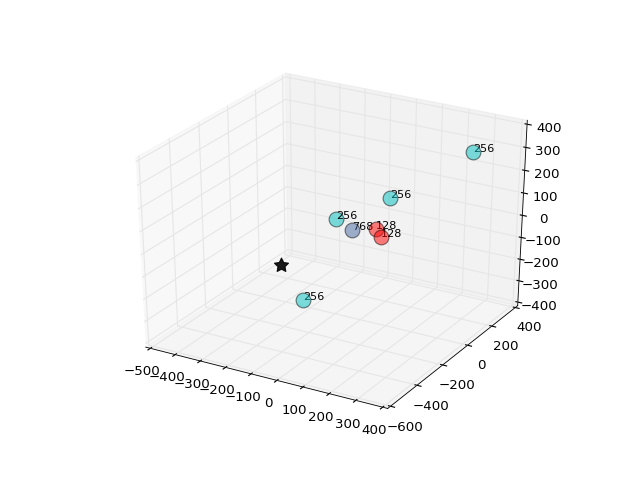

In [10]:
plot_tsne_3d(X_tsne, y)


### tsne-2d

In [11]:
tsne2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne_2d = tsne2d.fit_transform(X)

print X_tsne_2d
print X_tsne_2d.shape

[[ -22.07402832  -39.67809193]
 [ -44.48543224  145.55184528]
 [  21.55580236 -174.28802486]
 [ 130.39406384  -68.78384556]
 [  53.1031426    64.01804356]
 [ 184.13407671   78.15531996]
 [-149.46124638  -69.70561943]
 [-167.3312684    77.8858285 ]]
(8, 2)


In [12]:
top3rows, top3bs = predit_bs_tsne(X_tsne_2d, y)

input X dims : 8 x 2
row 0 : dist=186.871456315
row 1 : dist=140.249025986
row 2 : dist=315.071385274
row 3 : dist=331.892101065
row 4 : dist=220.870199469
row 5 : dist=351.465448433
row 6 : dist=148.669341799
Top 3 distance : 140.249025986 , 148.669341799 ,186.871456315
Top 3 rows : 1 , 6 ,0
Top 3 ranking : 256 , 768 ,256


<IPython.core.display.Javascript object>


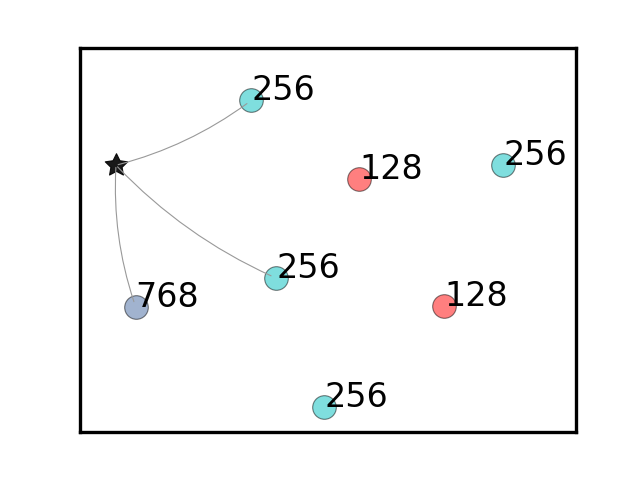

In [13]:
plot_tsne_2d(X_tsne_2d, y, top3rows)